# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Network Analysis
> Author: Matt Brems (DC). Leo (SG)

In [1]:
# Uncomment to install NetworkX and Pyvis
# ! pip install --upgrade networkx  pyvis

In [2]:
# NetworkX to create and work with Networks
import networkx as nx

# Pyvis to visualise the graps from Networkx
from pyvis.network import Network

# To create all possible pairs from a list
# We need this to crete the Network in Networkx
# Eg: x = [1,2,3,4]
# list(itertools.combinations(x, 2)) -> [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
import itertools

# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NetworkX Library

In Python, the [NetworkX library](https://networkx.github.io/) is one that will allow us to work with graphs

In [3]:
# Instantiate a graph object as "g".
g = nx.Graph()

In [4]:
# Create nodes 'a' and 'b', then add an edge between them.
# We just need to specify the edges. Nodes are auto created!
g.add_edge('a','b')

In [5]:
# Draw the network
pyvis_net = Network(notebook=True)
pyvis_net.from_nx(g)
pyvis_net.show('g1.html')

In [6]:
# Add nodes 'c' and 'd' and create edges among them.
g.add_edge('b','c')
g.add_edge('a','c')
g.add_edge('c','d')

# Draw the network
pyvis_net = Network(notebook=True)
pyvis_net.from_nx(g)
pyvis_net.show('g2.html')

In [38]:
# In Network g, find the shortest path between node 'b' to 'd'
nx.shortest_path(g,'b','d')

['b', 'c', 'd']

In [8]:
# In Network g, find the length of shortest path between node 'b' to 'd'
# Each edge is counted as 1
nx.shortest_path_length(g,'b','d')

2

In [9]:
# Add additional edge between 'a' and 'b'.
g.add_edge('a','b')

# Draw the network
pyvis_net = Network(notebook=True)
pyvis_net.from_nx(g)
pyvis_net.show('g3.html')

In [11]:
# Network with weights for the edges
g = nx.Graph()
g.add_edge('a','b', weight=1)
g.add_edge('b','c', weight=5)
g.add_edge('a','c', weight=1)
g.add_edge('c','d', weight=1)

# Draw the network
pyvis_net = Network(notebook=True)
pyvis_net.from_nx(g)
pyvis_net.show('g4.html')

In [12]:
# Shortest path between b to d WITHOUT weights
print(f"Shortest path between b to d WITHOUT weights: {nx.shortest_path(g,'b','d')}")

# Shortest path between b to d WITH weights
print(f"Shortest path between b to d WITH weights: {nx.shortest_path(g,'b','d', weight='weight')}")

Shortest path between b to d WITHOUT weights: ['b', 'c', 'd']
Shortest path between b to d WITH weights: ['b', 'a', 'c', 'd']


### Seven Bridges of Königsberg

In [14]:
# Instantiate a multigraph object as "seven_bridges".
seven_bridges = nx.MultiGraph()

In [18]:
# Create all seven bridges at once!
seven_bridges.add_edges_from([('A','B'),
                              # ('A','B'),
                              ('A','C'),
                              ('B','C'),
                              # ('B','D'),
                              ('B','D'),
                              ('C','D')])

[2, 1, 1, 2, 1]

# NetworkX Algorithms
- NetworkX is like the sklearn of Network graphs! It includes a lot of Graph algorithms
- Eulerian Graph: [Link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.euler.is_eulerian.html?highlight=is_eulerian#networkx.algorithms.euler.is_eulerian)
- Isomorphic: [Link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.is_isomorphic.html#networkx.algorithms.isomorphism.is_isomorphic)


In [19]:
# Check to see if each bridge can be traveled exactly once.
# Pronounced: Oiler-ian
nx.is_eulerian(seven_bridges)

False

In [16]:
# Is seven_bridges isomorphic to g?
nx.is_isomorphic(g, seven_bridges)

False

In [17]:
# Is seven_bridges isomorphic to seven_bridges?
nx.is_isomorphic(seven_bridges, seven_bridges)

True

# More Complex Example
- Let's analyse the project groupings for DSIF3 Class!

In [20]:
df = pd.read_csv('../data/dsif_3_project_grouping.csv')

print(df.shape)
df.head()

(28, 5)


,Name,Gender,Project1,Project2,Project3
0,DJ,M,1,3,5.0
1,Hong Aik,M,1,6,1.0
2,Zhi Yuan,M,1,4,4.0
3,Hang Feng,M,1,4,2.0
4,May Gee,F,1,6,6.0


In [21]:
# Extract out the genders for each person as a dictionary
gender_df = df[['Name', 'Gender']]
gender_df = gender_df.set_index('Name')
gender_df.columns = ['group']
print(gender_df.head())

# Convert to dictionary. This is the format NetworkX expects
genders = gender_df.to_dict(orient='index')
genders

          group
Name           
DJ            M
Hong Aik      M
Zhi Yuan      M
Hang Feng     M
May Gee       F


{'DJ': {'group': 'M'},
 'Hong Aik': {'group': 'M'},
 'Zhi Yuan': {'group': 'M'},
 'Hang Feng': {'group': 'M'},
 'May Gee': {'group': 'F'},
 'Bryan': {'group': 'M'},
 'Vincent': {'group': 'M'},
 'Darren': {'group': 'M'},
 'Nazira': {'group': 'F'},
 'Yu Kiat': {'group': 'M'},
 'Raymond': {'group': 'M'},
 'Zheng Foong': {'group': 'M'},
 'Shuyi': {'group': 'F'},
 'Darien': {'group': 'M'},
 'Mitchelle': {'group': 'F'},
 'Jia Wen': {'group': 'F'},
 'Cheng Yeow': {'group': 'M'},
 'Mun Yee': {'group': 'F'},
 'Zhewei': {'group': 'M'},
 'Chee Tzen': {'group': 'M'},
 'Flash': {'group': 'M'},
 'Brandon': {'group': 'M'},
 'Sean Ng': {'group': 'M'},
 'Kimberly': {'group': 'F'},
 'Thien Sean': {'group': 'M'},
 'Kris Ng': {'group': 'F'},
 'Wee Hong': {'group': 'M'},
 'Cheng Kiat': {'group': 'M'}}

## Creating a NetworkX graph from real data
We are going to create a list of NetworkX graphs, one for each project group:
```
network_list = [ project1_graph, project2_graph, project3_graph ]
```

### Steps:

Since each project's grouping is in a separate column, let's loop over the project columns one by one:
1. For each project column, let's create an empty list `project_edges` to store all the project groups in that project
2. Loop over each group in the project column we're currently in
    - Find all the members in that project group
    - Convert the list of project members to a 2x2 grouping. Eg:
    ```
    project_members = ['DJ', 'Hong Aik', 'Zhi Yuan`]
    2x2 -> [('DJ', 'Hong Aik'), ('DJ, 'Zhi Yuan'), ('Hong Aik', 'Zhi Yuan')]
    ```
    c. Add this 2x2 grouping into our `project_edges` list
3. Create an empty NetworkX graph and add all the edges from `project_edges` into it.
4. Set a node attribute with the gender of each person. This will help to automatically color our plots later!
5. Add this updated NetworkX graph into our `network_list`

In [22]:
list(range(3))

[0, 1, 2]

In [23]:
# Create an empty list to store the networks for each project
network_list = []

# Loop over each project we completed so far (3)
for project in range(3):
    
    # Create an empty list to store the edges in each project
    project_edges = []
    
    # Loop over each group in the project
    for group in df[f'Project{project+1}'].unique():
        
        # Find all the project members belonging to the group
        project_members = df.loc[df[f'Project{project+1}']==group, 'Name'].values.tolist()
        print(project_members)
        
        # Convert the list of project members to a 2x2 grouping
        # This is the format NetworkX requires to build a graph
        project_edges += list(itertools.combinations(project_members, 2))
        print(project_edges)
        
    # Create a network graph with all edges until this project
    project_network = nx.Graph()
    project_network.add_edges_from(project_edges)
    
    # Add gender to the network
    nx.set_node_attributes(project_network, genders)
    
    # Add the network into the overall list of networks                                                          
    network_list.append(project_network)

print(len(network_list))

['DJ', 'Hong Aik', 'Zhi Yuan', 'Hang Feng', 'May Gee']
[('DJ', 'Hong Aik'), ('DJ', 'Zhi Yuan'), ('DJ', 'Hang Feng'), ('DJ', 'May Gee'), ('Hong Aik', 'Zhi Yuan'), ('Hong Aik', 'Hang Feng'), ('Hong Aik', 'May Gee'), ('Zhi Yuan', 'Hang Feng'), ('Zhi Yuan', 'May Gee'), ('Hang Feng', 'May Gee')]
['Bryan', 'Vincent', 'Darren', 'Nazira']
[('DJ', 'Hong Aik'), ('DJ', 'Zhi Yuan'), ('DJ', 'Hang Feng'), ('DJ', 'May Gee'), ('Hong Aik', 'Zhi Yuan'), ('Hong Aik', 'Hang Feng'), ('Hong Aik', 'May Gee'), ('Zhi Yuan', 'Hang Feng'), ('Zhi Yuan', 'May Gee'), ('Hang Feng', 'May Gee'), ('Bryan', 'Vincent'), ('Bryan', 'Darren'), ('Bryan', 'Nazira'), ('Vincent', 'Darren'), ('Vincent', 'Nazira'), ('Darren', 'Nazira')]
['Yu Kiat', 'Raymond', 'Zheng Foong', 'Shuyi', 'Darien']
[('DJ', 'Hong Aik'), ('DJ', 'Zhi Yuan'), ('DJ', 'Hang Feng'), ('DJ', 'May Gee'), ('Hong Aik', 'Zhi Yuan'), ('Hong Aik', 'Hang Feng'), ('Hong Aik', 'May Gee'), ('Zhi Yuan', 'Hang Feng'), ('Zhi Yuan', 'May Gee'), ('Hang Feng', 'May Gee'), ('Br

In [24]:
# Plot Network for Project 1
# Draw the network
pyvis_net = Network(notebook=True, width='100%')
pyvis_net.from_nx(network_list[0])
pyvis_net.show('project1.html')

In [25]:
# Plot Network for Project 2
# Draw the network
pyvis_net = Network(notebook=True, width='100%')
pyvis_net.from_nx(network_list[1])
pyvis_net.show('project2.html')

In [26]:
# Plot Network for Project 3
# Draw the network
pyvis_net = Network(notebook=True, width='100%')
pyvis_net.from_nx(network_list[2])
pyvis_net.show('project3.html')

In [32]:
# Combine all three projects 
# To check the interaction between the entire class after 3 Projects

# First crete an empty graph
combined_network = nx.Graph()

# Loop over each network in our network_list and add it to combined_network
for project_network in network_list:
    combined_network = nx.compose(combined_network, project_network)

# Draw the network
pyvis_net = Network(notebook=True, width='100%')
pyvis_net.from_nx(combined_network)
pyvis_net.show('combined_network.html')

- From the dense single cluster network we can see each person is well connected to everyone else in the class
- The TAs have been doing a great job to randomly shuffle people across groups!

In [33]:
# Let's see if any person has lesser connections than other
# Network centrality measures can give us how connected each node is wrt the entire graph: https://networkx.org/documentation/stable/reference/algorithms/centrality.html
# Closeness centrality is one kind of centrality measurement: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality
centrality = pd.DataFrame(nx.closeness_centrality(combined_network), index=['closeness centrality']).T
centrality.sort_values('closeness centrality')

,closeness centrality
Flash,0.574468
Vincent,0.586957
Mitchelle,0.586957
Bryan,0.600000
Hong Aik,0.613636
Hang Feng,0.613636
Mun Yee,0.613636
Shuyi,0.613636
Cheng Yeow,0.613636
Jia Wen,0.613636


- Analysing Vincent and Mitchelle, looks like they've always been in 4 member groups throughout al 3 projects
- TAs to take note and assign them to 5 member groups in the next project if possible!
- Centrality not only measures the direct connections each node has but also the connection's connections and their subsequent connections and so on!

In [34]:
genders_df = pd.DataFrame(genders).T
genders_df.head()

,group
DJ,M
Hong Aik,M
Zhi Yuan,M
Hang Feng,M
May Gee,F


In [35]:
# join genders to centrality
gender_centrality = centrality.join(genders_df)
gender_centrality.head()

,closeness centrality,group
DJ,0.627907,M
Hong Aik,0.613636,M
Zhi Yuan,0.627907,M
Hang Feng,0.613636,M
May Gee,0.627907,F


<AxesSubplot:xlabel='group', ylabel='closeness centrality'>

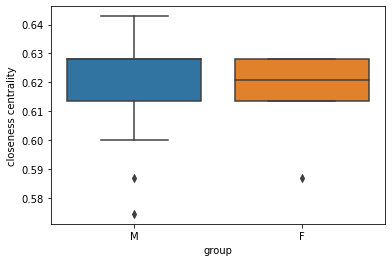

In [36]:
# Check difference in centrality between genders
import seaborn as sns
sns.boxplot(x='group', y='closeness centrality', data=gender_centrality)

In [26]:
# Run a statistical test to check if the two groups have a difference
from scipy.stats import f_oneway
male_centrality = gender_centrality.loc[gender_centrality['group']=='M', 'centrality'].values
female_centrality = gender_centrality.loc[gender_centrality['group']=='F', 'centrality'].values

f_oneway(male_centrality, female_centrality)

F_onewayResult(statistic=0.5245738323897355, pvalue=0.4753644893432286)

- Since the p-value is > 0.05, we ***cannot*** reject the Null Hypothesis
- Thus there is no statistical difference in centrality between Male students and Female students
- In other words, neither Male nor Female students are unfairly isolated in the class and both genders have equal chance of networking!

# Conclusions
- Networks/Graphs are cool!
- They help to visualize and analyse data that is interconnected
- Some NLP techniques treat language as a Graph of connected words!
- Graph algorithms are very popular in certain applications such as sequential recommendation engines, knowledge graphs, etc
- [Pyvis](https://pyvis.readthedocs.io/en/latest/) is the easiest plotting library I've come across to plot interactive graph visualisations. I'm personally using it in my StripNet [HuggingFace Spaces App](https://huggingface.co/spaces/stephenleo/stripnet)! It uses the Javascript library [VisJS](https://visjs.github.io/vis-network/docs/network/) under the hood for all the options.
- Free ebook on various graph algorithms: [Link](https://neo4j.com/graph-algorithms-book/)

# Bonus

In [27]:
# Find all neighbors for a given node
list(combined_network.neighbors(n='Vincent'))

['Bryan',
 'Darren',
 'Nazira',
 'Zheng Foong',
 'Mitchelle',
 'DJ',
 'Mun Yee',
 'Kimberly']

In [28]:
# Find all second degree connections
def get_second_degree_connections(graph, node):
    """
    Returns a list of unique second degree connections for a given node in the graph.
    # https://stackoverflow.com/questions/11174122/neighbors-of-second-order
    """
    return set([second_neighbor 
            for first_neighbor in graph.neighbors(node)
            for second_neighbor in graph.neighbors(first_neighbor) 
            if second_neighbor != node])

In [30]:
second_degree_connections = get_second_degree_connections(combined_network, 'Vincent')

print(len(second_degree_connections))
second_degree_connections

27


{'Brandon',
 'Bryan',
 'Chee Tzen',
 'Cheng Kiat',
 'Cheng Yeow',
 'DJ',
 'Darien',
 'Darren',
 'Flash',
 'Hang Feng',
 'Hong Aik',
 'Jia Wen',
 'Kimberly',
 'Kris Ng',
 'May Gee',
 'Mitchelle',
 'Mun Yee',
 'Nazira',
 'Raymond',
 'Sean Ng',
 'Shuyi',
 'Thien Sean',
 'Wee Hong',
 'Yu Kiat',
 'Zheng Foong',
 'Zhewei',
 'Zhi Yuan'}